In [68]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [69]:
### helper functions

# get the minimum gray value in a neighbourhood
def get_min(matrix):
    row, col = matrix.shape
    if len(matrix) == 0:
        return -1
    min = 256
    for r in range(row):
        for c in range(col):
            if matrix[r][c] < min:
                min = matrix[r][c]
    return min


# get the maximum gray value in a neighbourhood
def get_max(matrix):
    row, col = matrix.shape
    if len(matrix) == 0:
        return -1
    max = -1
    for r in range(row):
        for c in range(col):
            if matrix[r][c] > max:
                max = matrix[r][c]
    return max

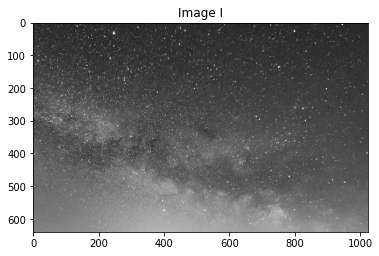

In [70]:
### Task 1

# Step 1 - Create new image A

imgI = cv2.imread('/Users/yueyifei/Desktop/COMP9517/comp9517/asm/COMP9517_22T2_Assignment_Images/Milkyway.png', 0)
imgA = np.zeros(imgI.shape)

# show image I
plt.title('Image I')
plt.imshow(imgI, cmap='gray', vmin=0, vmax=255)
plt.show()

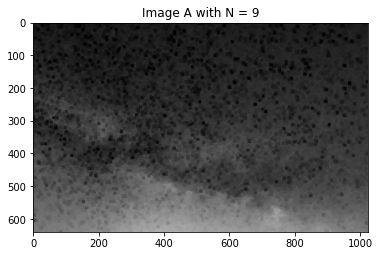

In [71]:
# Step 2 - Calculate the image A which is the min-filtered image of input image

row, col = imgI.shape

# try n = 3, 5, 7, 9, 11
N = 9
l = N // 2

# padding
img_padded = np.full((2 * l + row, 2 * l + col), 255)
img_padded[l:-l, l:-l] = imgI

# min-filtered
for r in range(l, row+l):
    for c in range(l, col+l):
        imgA[r - l, c - l] = get_min(img_padded[r - l:r + l + 1, c - l: c + l + 1])

# show image A
plt.title('Image A with N = ' + str(N))
plt.imshow(imgA, cmap='gray', vmin=0, vmax=255)
plt.show()

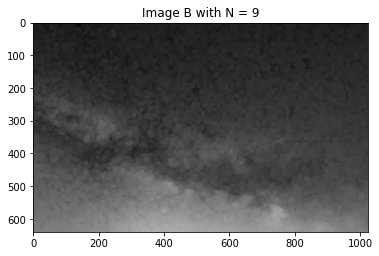

In [72]:
# Step 3 - Create new image B

imgB = np.zeros(imgI.shape)

# Step 4 - Calculate the image B which is the max-filtered image of image A

imgA_padded = np.full((2 * l + row, 2 * l + col), 0)
imgA_padded[l:-l, l:-l] = imgA

# max-filtered
for r in range(l, row + l):
    for c in range(l, col + l):
        imgB[r - l,c - l] = get_max(imgA_padded[r - l:r + l + 1, c - l: c + l + 1])

# show image B
plt.title('Image B with N = ' + str(N))
plt.imshow(imgB, cmap='gray', vmin=0, vmax=255)
plt.show()

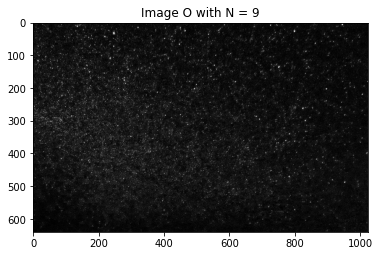

In [73]:
### Task 2

imgO = np.zeros(imgI.shape)

# subtract each pixel of image B from image I
for r in range(row):
    for c in range(col):
        imgO[r, c] = imgI[r, c] - imgB[r, c]
plt.title('Image O with N = 9')
plt.imshow(imgO, cmap='gray', vmin=0, vmax=255)
plt.show()

In [74]:
### Task 3

def min_filtered(img, N):
    row, col = img.shape
    img_filtered = np.zeros(img.shape)

    # padding
    l = N // 2
    img_padded = np.full((2 * l + row, 2 * l + col), 255)
    img_padded[l:-l, l:-l] = img

    # min-filtered
    for r in range(l, row + l):
        for c in range(l, col + l):
            img_filtered[r - l, c - l] = get_min(img_padded[r - l:r + l + 1, c - l:c + l + 1])
    return img_filtered

def max_filtered(img, N):
    row, col = img.shape
    img_filtered = np.zeros(img.shape)

    # padding
    l = N // 2
    img_padded = np.full((2 * l + row, 2 * l + col), 0)
    img_padded[l:-l, l:-l] = img

    # max-filtered
    for r in range(l, row + l):
        for c in range(l, col + l):
            img_filtered[r - l, c - l] = get_max(img_padded[r - l:r + l + 1, c - l:c + l + 1])
    return img_filtered

def bgm_sub(img1, img2, M):
    imgO = np.zeros(img1.shape)
    row, col = img1.shape

    for r in range(row):
        for c in range(col):
            if M == 0:
                imgO[r, c] = img1[r, c] - img2[r, c]
            else:
                imgO[r, c] = img1[r, c].astype('int32') - img2[r, c].astype('int32') + 255
    return imgO.astype('uint8')

def get_objects(img, N, M):
    # M = 0, when the objects are bright and the background is dark
    if M == 0:
        imgA = min_filtered(img, N)
        imgB = max_filtered(imgA, N)
        imgO = bgm_sub(img, imgB, M)
    # M = 1, when the objects are dark and the background is bright
    else:
        imgA = max_filtered(img, N)
        imgB = min_filtered(imgA, N)
        imgO = bgm_sub(img, imgB, M)
    return imgO

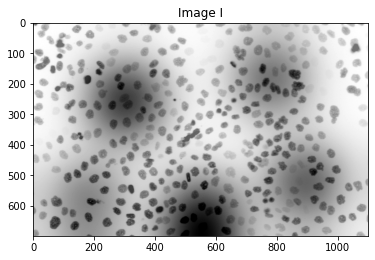

In [75]:
N = 25
M = 1

cells_imgI = cv2.imread('/Users/yueyifei/Desktop/COMP9517/comp9517/asm/COMP9517_22T2_Assignment_Images/Cells.png', 0)
plt.title('Image I')
plt.imshow(cells_imgI, cmap='gray', vmin=0, vmax=255)
plt.show()

In [76]:
cells_imgA = max_filtered(cells_imgI, N)

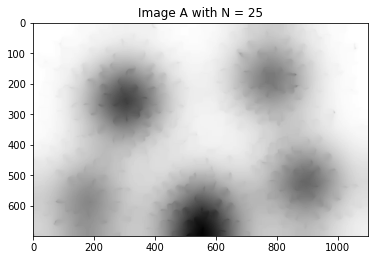

In [77]:
plt.title('Image A with N = ' + str(N))
plt.imshow(cells_imgA, cmap='gray', vmin=0, vmax=255)
plt.show()

In [78]:
cells_imgB = min_filtered(cells_imgA, N)

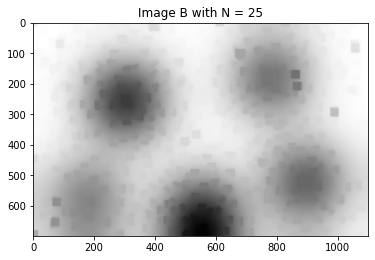

In [79]:
plt.title('Image B with N = ' + str(N))
plt.imshow(cells_imgB, cmap='gray', vmin=0, vmax=255)
plt.show()

In [80]:
cells_imgO = get_objects(cells_imgI, N, M)

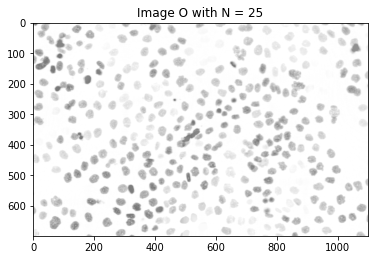

In [81]:
plt.title('Image O with N = ' + str(N))
plt.imshow(cells_imgO, cmap='gray', vmin=0, vmax=255)
plt.show()